In [1]:
#필수 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

#편의 세팅
os.chdir("C:/Users/pyw20/VScode_Workspace")
warnings.filterwarnings(action='ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('train.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26451 non-null  int64  
 1   car            26451 non-null  int64  
 2   reality        26451 non-null  int64  
 3   child_num      26451 non-null  int64  
 4   income_total   26451 non-null  float64
 5   income_type    26451 non-null  int64  
 6   edu_type       26451 non-null  int64  
 7   family_type    26451 non-null  int64  
 8   house_type     26451 non-null  int64  
 9   DAYS_BIRTH     26451 non-null  int64  
 10  DAYS_EMPLOYED  26451 non-null  int64  
 11  work_phone     26451 non-null  int64  
 12  phone          26451 non-null  int64  
 13  email          26451 non-null  int64  
 14  occyp_type     26451 non-null  int64  
 15  family_size    26451 non-null  float64
 16  begin_month    26451 non-null  float64
 17  credit         26451 non-null  float64
dtypes: flo

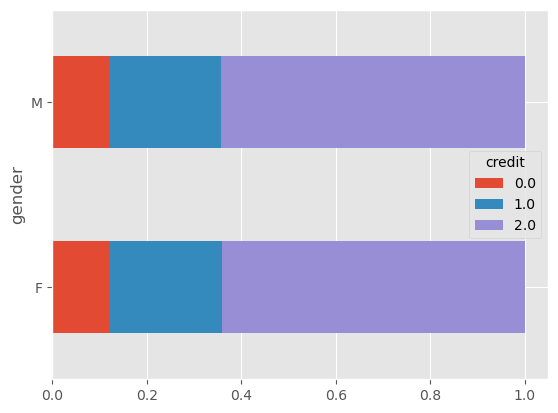

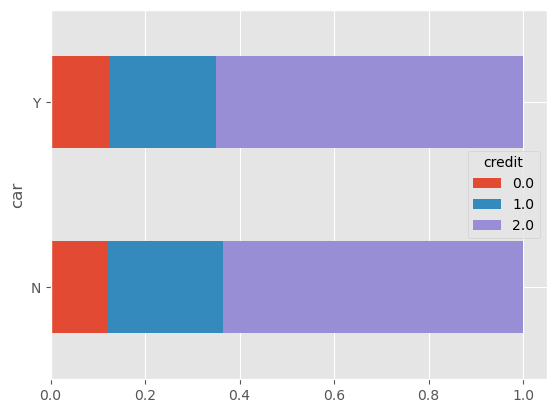

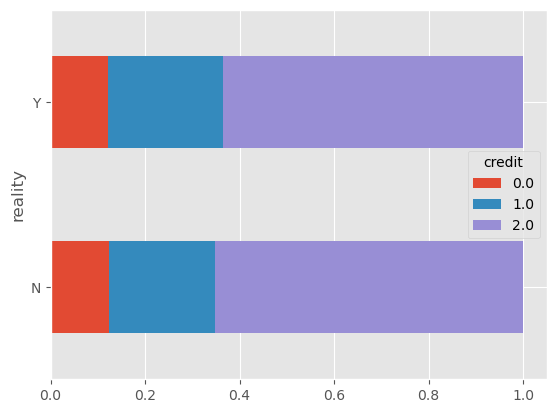

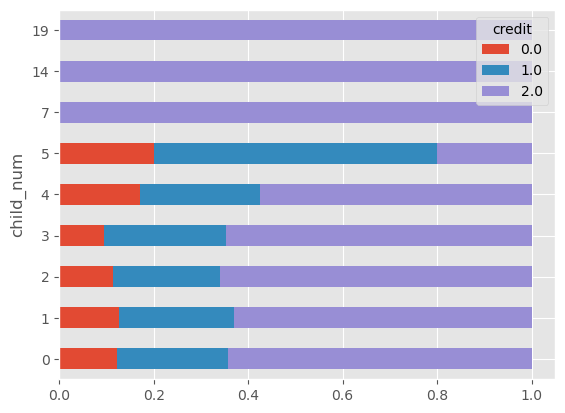

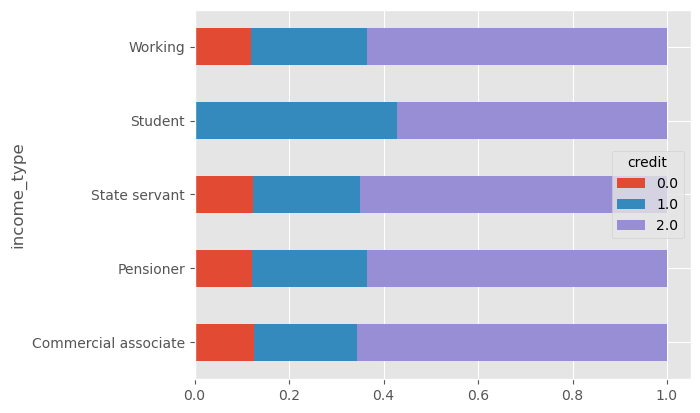

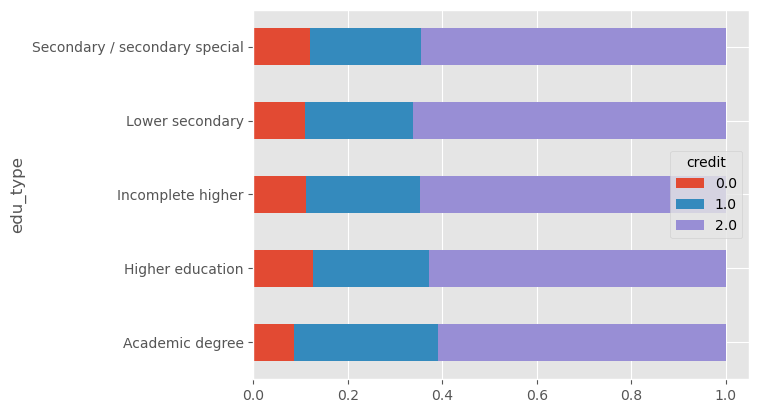

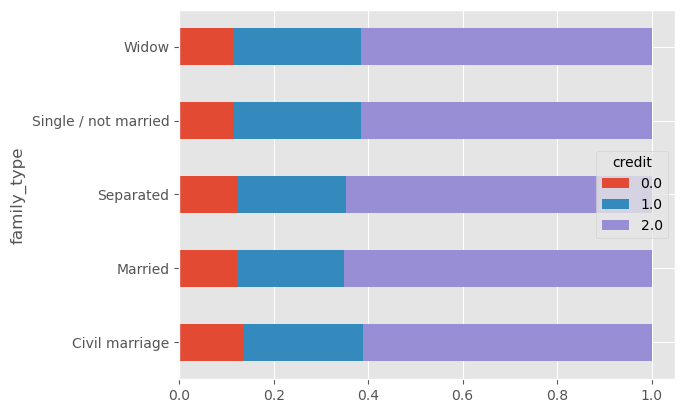

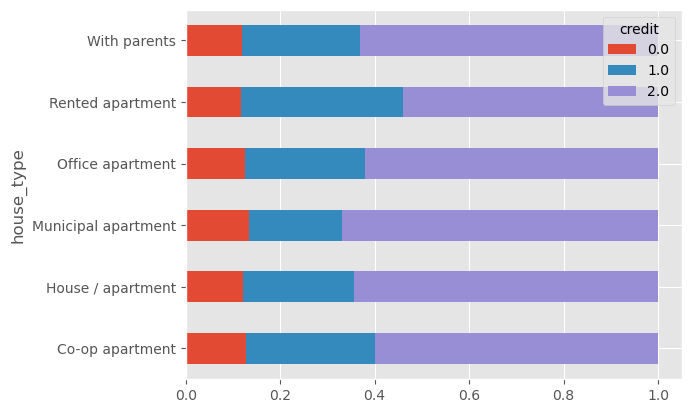

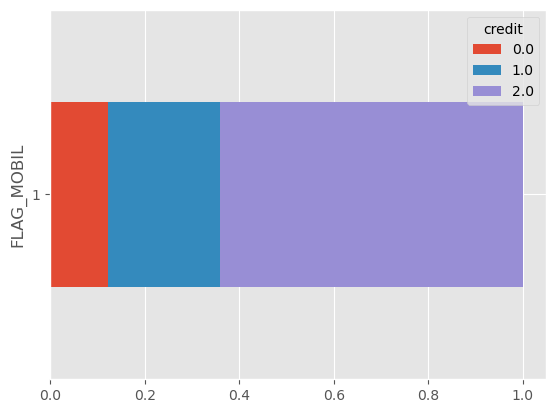

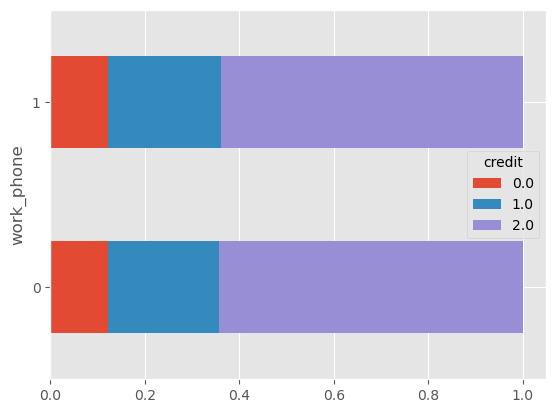

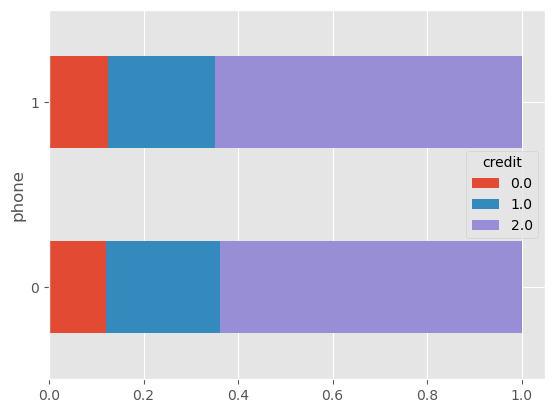

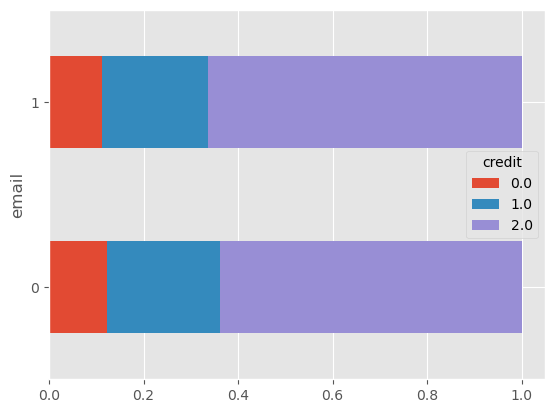

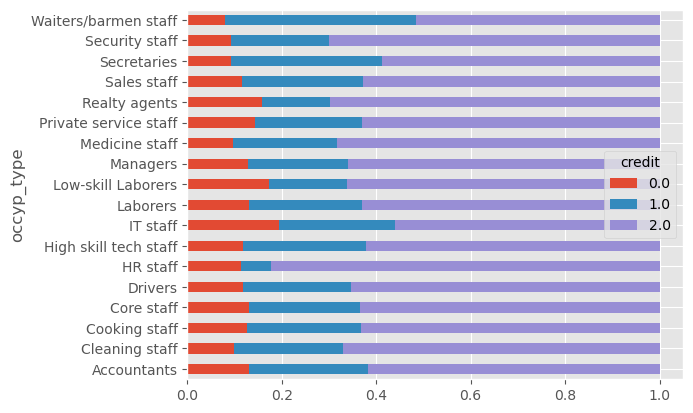

In [19]:
for i in [1,2,3,4,6,7,8,9,12,13,14,15,16]:   
    temp = data.groupby(data.columns[i],as_index=False)['credit'].value_counts(normalize=True)
    temp.pivot(index=data.columns[i],columns='credit',values='proportion').plot.barh(stacked=True)

<AxesSubplot: ylabel='income_percentile'>

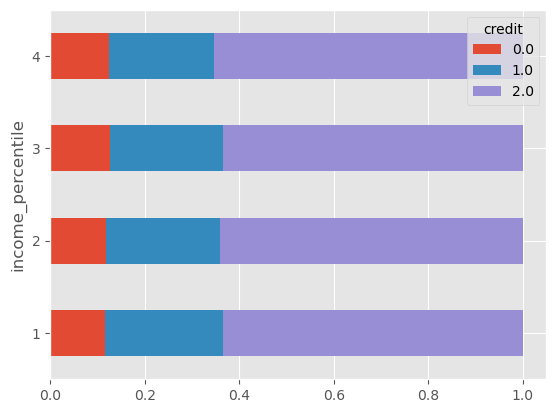

In [41]:
pct = np.percentile(data['income_total'],[25,50,75])

data['income_percentile'] = np.where(data['income_total'] >= 225000, 4, 
                            np.where(data['income_total'] >= 157500, 3,
                            np.where(data['income_total'] >= 121500, 2,1)))

temp = data.groupby('income_percentile',as_index=False)['credit'].value_counts(normalize=True)
temp.pivot(index='income_percentile',columns='credit',values='proportion').plot.barh(stacked=True)

data.drop('income_percentile', axis=1, inplace=True)

<AxesSubplot: ylabel='DAYS_BIRTH_percentile'>

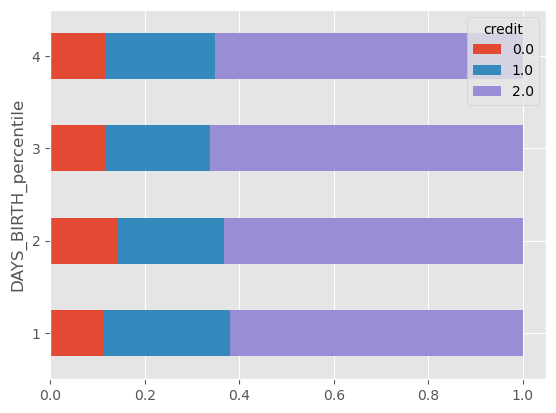

In [45]:
pct = np.percentile(data['DAYS_BIRTH'],[25,50,75])

data['DAYS_BIRTH_percentile'] = np.where(data['DAYS_BIRTH'] <= pct[0], 4, 
                            np.where(data['DAYS_BIRTH'] <= pct[1], 3,
                            np.where(data['DAYS_BIRTH'] <= pct[2], 2,1)))

temp = data.groupby('DAYS_BIRTH_percentile',as_index=False)['credit'].value_counts(normalize=True)
temp.pivot(index='DAYS_BIRTH_percentile',columns='credit',values='proportion').plot.barh(stacked=True)

data.drop('DAYS_BIRTH_percentile', axis=1, inplace=True)

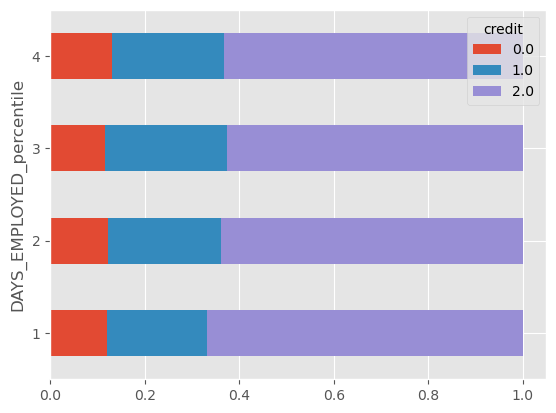

In [37]:
pct = np.percentile(data['DAYS_EMPLOYED'],[25,50,75])

data['DAYS_EMPLOYED_percentile'] = np.where(data['DAYS_EMPLOYED'] <= pct[0], 4, 
                            np.where(data['DAYS_EMPLOYED'] <= pct[1], 3,
                            np.where(data['DAYS_EMPLOYED'] <= pct[2], 2,1)))

temp = data.groupby('DAYS_EMPLOYED_percentile',as_index=False)['credit'].value_counts(normalize=True)
temp.pivot(index='DAYS_EMPLOYED_percentile',columns='credit',values='proportion').plot.barh(stacked=True)

data.drop('DAYS_EMPLOYED_percentile', axis=1, inplace=True)

<AxesSubplot: ylabel='begin_month_percentile'>

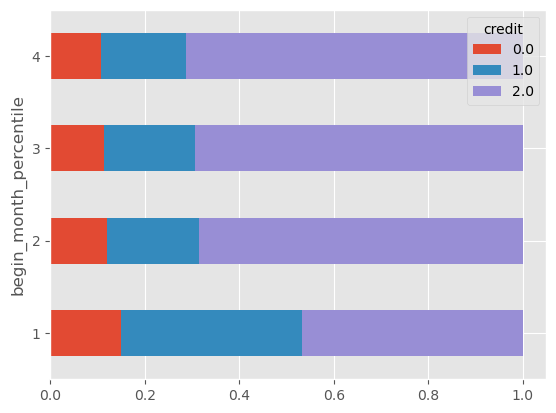

In [47]:
pct = np.percentile(data['begin_month'],[25,50,75])

data['begin_month_percentile'] = np.where(data['begin_month'] <= pct[0], 4, 
                            np.where(data['begin_month'] <= pct[1], 3,
                            np.where(data['begin_month'] <= pct[2], 2,1)))

temp = data.groupby('begin_month_percentile',as_index=False)['credit'].value_counts(normalize=True)
temp.pivot(index='begin_month_percentile',columns='credit',values='proportion').plot.barh(stacked=True)

data.drop('begin_month_percentile', axis=1, inplace=True)

In [11]:
#텍스트가 적힌 범주형 피처 정수 인코딩
from sklearn.preprocessing import OrdinalEncoder

oed = OrdinalEncoder(dtype='int64',encoded_missing_value=-1)

data['gender'] = oed.fit_transform(data['gender'][:,np.newaxis])
data['car'] = oed.fit_transform(data['car'][:,np.newaxis])
data['reality'] = oed.fit_transform(data['reality'][:,np.newaxis])
data['income_type'] = oed.fit_transform(data['income_type'][:,np.newaxis])
data['edu_type'] = oed.fit_transform(data['edu_type'][:,np.newaxis])
data['family_type'] = oed.fit_transform(data['family_type'][:,np.newaxis])
data['house_type'] = oed.fit_transform(data['house_type'][:,np.newaxis])
data['occyp_type'] = oed.fit_transform(data['occyp_type'][:,np.newaxis])

data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,365243,1,0,1,0,-1,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,3,2.0,-36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,8,2.0,-40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,4,2.0,-41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,10,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,-18593,-5434,1,1,1,0,0,2.0,-19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,-10886,-1315,1,1,0,0,8,2.0,-34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,-21016,-14018,1,0,0,0,11,2.0,-55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,-16541,-1085,1,0,1,0,-1,2.0,-33.0


In [5]:
raw_data = data.copy()

In [12]:
#무직자 근무일수 조정
data[data['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'] = 1

#음수 피처를 양수로 변환
data['begin_month'] = data['begin_month'] * (-1)
data['DAYS_BIRTH'] = data['DAYS_BIRTH'] * (-1)
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'] * (-1)

In [13]:
#자녀 수가 이상치인 행 삭제
#data = data[data['child_num'] < 7]

#모든 행이 같은 값을 가지는 피처 제거
data.drop('FLAG_MOBIL',inplace=True, axis=1)

#필요 없는 인덱스 제거
data.drop('index',inplace=True, axis=1)

In [14]:
#수입과 고용일, 생후일수, 직업 유형으로 각 개인별 id 생성
data['id'] = data['income_total'].astype('str') + data['DAYS_BIRTH'].astype('str') + \
             data['DAYS_EMPLOYED'].astype('str') + data['occyp_type'].astype('str')

#각 개인별 id를 정수로 인코딩
data['id'] = oed.fit_transform(data['id'][:,np.newaxis])

In [15]:
#고용일을 개월수로 전환
data['employ_month'] = data['DAYS_EMPLOYED'] // 30
data.drop('DAYS_EMPLOYED', axis=1, inplace=True)

#생후일수를 개월수로 전환
data['birth_month'] = data['DAYS_BIRTH'] // 30
data.drop('DAYS_BIRTH', axis=1, inplace=True)

In [16]:
#취업전 생후개월 수
data['unemploy_month'] = data['birth_month'] - data['employ_month']

#전체 생애 대비 카드 가입 기간 비율
data['card_birth_ratio'] = data['begin_month'] / data['birth_month']

#근로 개월수 대비 카드 가입 기간 비율
data['card_employ_ratio'] = data['begin_month'] / data['employ_month']

#전체 생애 대비 근로 기간 비율
data['employ_month_ratio'] = data['employ_month'] / data['birth_month']

#근로 기간 대비 수입
data['income/employ'] = data['income_total'] / data['employ_month']

#생애 기간 대비 수입
data['income/birth'] = data['income_total'] / data['birth_month']

#가족 구성원 수 대비 수입
data['income/family'] = data['income_total'] / data['family_size']

#자녀가 아닌 가족 구성원 수
data['non_child_family'] = data['family_size'] - data['child_num']

In [9]:
import optuna
from optuna import Trial
from catboost import CatBoostClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial: Trial) -> float:
    params_cat = {"iterations": trial.suggest_int("iterations", 400, 1600),
                  "early_stopping_rounds": trial.suggest_int("early_stopping_rounds", 3, 9),
                  "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
                  "eval_metric": "MultiClass",
                  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-6, 3e-5),
                  "depth": trial.suggest_int("depth", 2, 16),
                  "rsm": trial.suggest_float("rsm", 0.5, 1.0),
                  "grow_policy": trial.suggest_categorical("grow_policy",["SymmetricTree","Depthwise","Lossguide"])
                  }
    
    x = data.drop('credit',axis=1)
    y = data['credit']

    model = CatBoostClassifier(**params_cat)
    log_score = cross_val_score(estimator=model, X=x, y=y, cv=5, scoring='neg_log_loss', n_jobs=-1).mean()
    
    return log_score

In [10]:
study = optuna.create_study(direction='maximize', sampler=TPESampler())

study.optimize(lambda trial : objective(trial), n_trials = 5)

[I 2023-11-12 14:53:44,881] A new study created in memory with name: no-name-de4688e8-0097-41bb-853b-c3c63f673a10
[I 2023-11-12 15:57:30,491] Trial 0 finished with value: -1.5347109834497377 and parameters: {'iterations': 496, 'early_stopping_rounds': 8, 'learning_rate': 0.06908908491964966, 'l2_leaf_reg': 1.0382083963732517e-06, 'depth': 16, 'rsm': 0.6610299678595745, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: -1.5347109834497377.
[I 2023-11-12 16:00:27,847] Trial 1 finished with value: -0.7875838886073294 and parameters: {'iterations': 1358, 'early_stopping_rounds': 3, 'learning_rate': 0.031095112362307352, 'l2_leaf_reg': 1.4820100777227779e-06, 'depth': 9, 'rsm': 0.7073163651909177, 'grow_policy': 'Depthwise'}. Best is trial 1 with value: -0.7875838886073294.
[I 2023-11-12 16:00:57,292] Trial 2 finished with value: -0.740148590664649 and parameters: {'iterations': 1254, 'early_stopping_rounds': 8, 'learning_rate': 0.09467552335982814, 'l2_leaf_reg': 4.4584746137129

In [9]:
best_params = {'iterations': 1254, 'early_stopping_rounds': 8, 'learning_rate': 0.09467552335982814, 'l2_leaf_reg': 4.458474613712979e-06, 'depth': 5, 'rsm': 0.8605630855338304, 'grow_policy': 'Depthwise'}

In [32]:
#정수 인코딩만 적용한 데이터셋 & 기본값 모델
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

x = raw_data.drop('credit',axis=1)
y = raw_data['credit']

model = CatBoostClassifier()
cross_val_score(estimator=model, X=x, y=y, cv=10, scoring='neg_log_loss', n_jobs=-1).mean()

-0.8066236913074611

In [13]:
#파생변수 생성 및 하이퍼파라미터 튜닝이 적용된 모델
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

x = data.drop('credit',axis=1)
y = data['credit']

model = CatBoostClassifier(**best_params)
cross_val_score(estimator=model, X=x, y=y, cv=10, scoring='neg_log_loss', n_jobs=-1).mean()

-0.7309398842497965